Nokia-ს ტელეფონები:
(1, 'Nokia', '1100', 'Bar', 'FALSE', 2003, 250)
(2, 'Nokia', '1110', 'Bar', 'FALSE', 2005, 247.5)
(4, 'Nokia', '105 Series', 'Bar', 'FALSE', 2013, 200)
(7, 'Nokia', '3210', 'Bar', 'FALSE', 1999, 161)
(11, 'Nokia', '6600', 'Bar', 'TRUE', 2003, 150)
(12, 'Nokia', '1200', 'Bar', 'FALSE', 2007, 150)
(13, 'Nokia', '5230', 'Touchscreen', 'TRUE', 2009, 150)
(16, 'Nokia', '2600(2610/2626/2630)', 'Bar', 'FALSE', 2004, 135)
(18, 'Nokia', '1600(1650/1661)', 'Bar', 'FALSE', 2005, 130)
(19, 'Nokia', '3310(3330)', 'Bar', 'FALSE', 2000, 126)
(22, 'Nokia', '1208(1209)', 'Bar', 'FALSE', 2007, 100)
(23, 'Nokia', '1280', 'Bar', 'FALSE', 2010, 100)
(24, 'Nokia', '6010(6020/6030)', 'Bar', 'FALSE', 2004, 75)
(27, 'Nokia', '5130(5220/5310)', 'Bar', 'FALSE', 2007, 65)
(34, 'Nokia', '3100(3120)', 'Bar', 'FALSE', 2003, 50)
(35, 'Nokia', '6230(6233)', 'Bar', 'FALSE', 2004, 50)
(37, 'Nokia', '6300', 'Bar', 'FALSE', 2006, 47)
(39, 'Nokia', 'N70(N72/N73)', 'Bar', 'TRUE', 2005, 45)
(44, 'Nokia', 

შეიყვანეთ მწარმოებელი:  LG
შეიყვანეთ მოდელი:  K8 V
შეიყვანეთ ფორმა (keyboard bar, Slider, Touchscreen):  Touchscreen
არის თუ არა სმარტფონი? (TRUE/FALSE):  TRUE
შეიყვანეთ წელი:  2010
შეიყვანეთ გაყიდული ტელეფონების რაოდენობა(მილიონებში):  2
შეიყვანეთ ის მოდელი, რომლის განახლებაც გსურთ:  Centro
შეიყვანეთ ახალი form_factor ამ მოდელისთვის:  Bar
შეიყვანეთ მოდელი, რომლის წაშლაც გსურთ:  K8 V


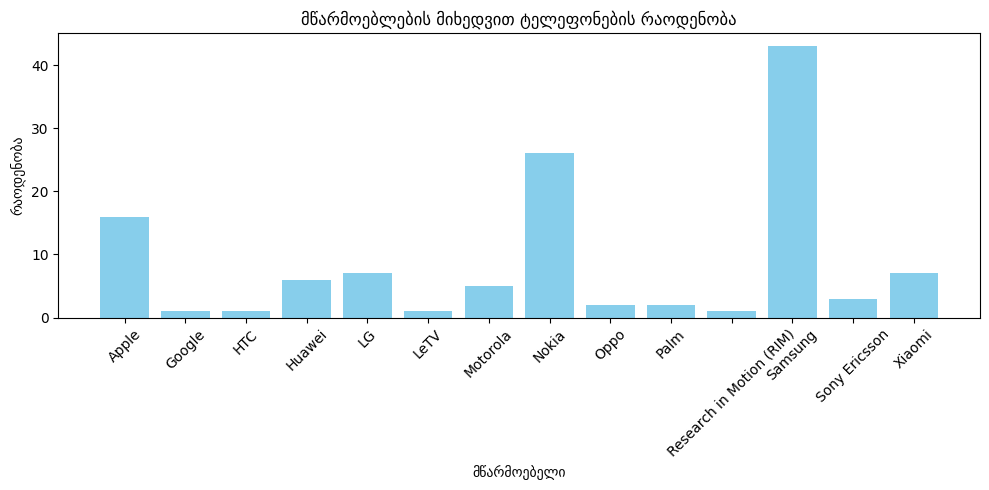

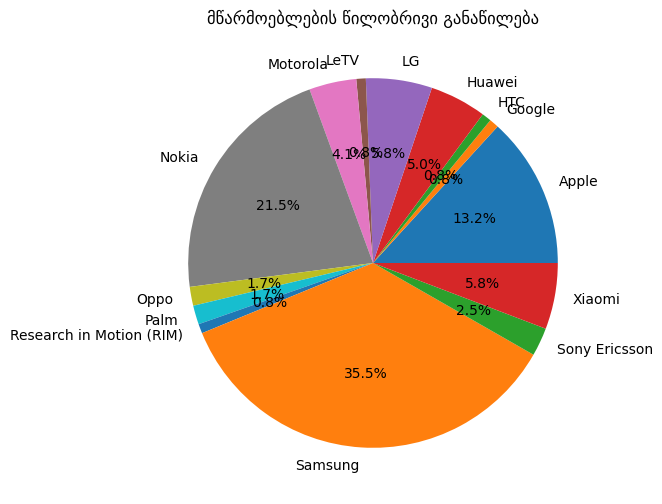

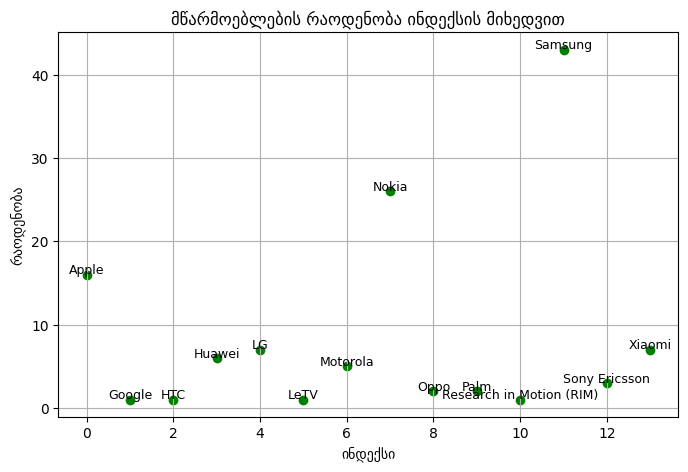

In [7]:
import sqlite3
import matplotlib.pyplot as plt

conn = sqlite3.connect('best_selling_phones.db')
c = conn.cursor()

c.execute("SELECT * FROM phones WHERE manufacturer = 'Nokia'")
results = c.fetchall()  # ვიღებთ ყველა შედეგს
print("Nokia-ს ტელეფონები:")
for row in results:
    print(row)
# კითხულობს ყველა იმ ჩანაწერს, სადაც მწარმოებელია Nokia და ბეჭდავს მათ

manufacturer = input("შეიყვანეთ მწარმოებელი: ")
model = input("შეიყვანეთ მოდელი: ")
form_factor = input("შეიყვანეთ ფორმა (keyboard bar, Slider, Touchscreen): ")
smartphone = input("არის თუ არა სმარტფონი? (TRUE/FALSE): ")
year = int(input("შეიყვანეთ წელი: "))
sold = float(input('შეიყვანეთ გაყიდული ტელეფონების რაოდენობა(მილიონებში): '))

c.execute('''INSERT INTO phones (Manufacturer, Model, FormFactor, Smartphone, Year, UnitsSold_million)
             VALUES (?, ?, ?, ?, ?, ?)''', (manufacturer, model, form_factor, smartphone, year, sold))
conn.commit()
# ამატებს მომხმარებლის მიერ შეყვანილი ახალი ტელეფონის მონაცემს ცხრილში

update_model = input("შეიყვანეთ ის მოდელი, რომლის განახლებაც გსურთ: ")
new_form_factor = input("შეიყვანეთ ახალი form_factor ამ მოდელისთვის: ")

c.execute('''UPDATE phones
             SET FormFactor = ?
             WHERE Model = ?''', (new_form_factor, update_model))
conn.commit()
# ცვლის form_factor-ს იმ მოდელისთვის, რომლის სახელიც მომხმარებელმა შეიყვანა

delete_model = input("შეიყვანეთ მოდელი, რომლის წაშლაც გსურთ: ")

c.execute("DELETE FROM phones WHERE model = ?", (delete_model,))
conn.commit()
# წაშლის იმ მოდელის ჩანაწერს ცხრილიდან, რომლის სახელიც შეყვანილია


# # ვიღებთ მონაცემებს მწარმოებლების მიხედვით
c.execute("SELECT manufacturer, COUNT(*) FROM phones GROUP BY manufacturer")
data = c.fetchall()
manufacturers = [row[0] for row in data]
counts = [row[1] for row in data]

plt.figure(figsize=(10,5))
plt.bar(manufacturers, counts, color='skyblue')
plt.title("მწარმოებლების მიხედვით ტელეფონების რაოდენობა")
plt.xlabel("მწარმოებელი")
plt.ylabel("რაოდენობა")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# დიაგრამა აჩვენებს თითოეული მწარმოებლის რამდენი ტელეფონია ბაზაში



plt.figure(figsize=(6,6))
plt.pie(counts, labels=manufacturers, autopct='%1.1f%%')
plt.title("მწარმოებლების წილობრივი განაწილება")
plt.show()
# წრიული დიაგრამა აჩვენებს რა წილი უკავია თითოეულ მწარმოებელს მთლიან მონაცემში



plt.figure(figsize=(8,5))
plt.scatter(range(len(manufacturers)), counts, color='green')
plt.title("მწარმოებლების რაოდენობა ინდექსის მიხედვით")
plt.xlabel("ინდექსი")
plt.ylabel("რაოდენობა")
plt.grid(True)

for i in range(len(manufacturers)):
    plt.text(i, counts[i] + 0.1, manufacturers[i], ha='center', fontsize=9, color='black')

plt.show()

# დიაგრამა აჩვენებს რაოდენობებს ინდექსების შესაბამისად

conn.close()